# Mini Project: Advanced Data Visualization with Plotnine and Plotly




## Task

**Data Loading and Preprocessing**:

* Load the dataset using Pandas.
* Perform necessary data cleaning and preprocessing.


**Exploratory Data Analysis (EDA)**:

* Summarize key statistics and distributions using Pandas.
* Identify interesting patterns or relationships in the data.


**Visualization with Plotnine**:

* Global Happiness Scores: Create a bar chart of happiness scores across countries.
* Economic Impact on Happiness: Use a scatter plot to explore the relationship between GDP per capita and happiness scores.
* Regional Comparisons: Generate boxplots to compare happiness scores across regions.
* Correlation Heatmap: Visualize the correlation between different factors using a heatmap.


**Interactive Visualizations with Plotly**:

* Interactive World Map: Create an interactive map displaying happiness scores across different countries.
* Dynamic Scatter Plot: Plot an interactive scatter plot exploring relationships between various factors like health, freedom, and happiness.
* Factor Analysis: Use a bubble chart to visualize the impact of social support and generosity on happiness scores, with bubble size representing country population.


**Advanced Analysis**:

* Perform a multi-variable analysis and visualize it using an interactive Plotly chart.
* Explore time-series aspects if temporal data is available, or compare with another year`s dataset.


**Insights and Interpretation**:

* Draw meaningful conclusions from your visualizations.
* Discuss any surprising or expected trends observed in the data.


**Guidelines**

* Each visualization should be accompanied by a brief interpretation.
* Focus on creating clear, informative, and visually appealing plots.
* Experiment with different plot types and customizations available in Plotnine and Plotly.
* Provide comments and documentation in your code for clarity.

---


**About the Dataset**:

We`ll use the “[World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness)” dataset, which ranks 156 countries by their happiness levels. It includes factors like economic production, social support, life expectancy, freedom, absence of corruption, and generosity.

**Columns**:

* **Country**: The name of the country.
* **Region**: The geographical region of the country.
* **Happiness Score**: The overall score representing the happiness level of the country.
* **GDP per Capita**: The gross domestic product per capita, indicating economic performance.
* **Social Support**: A measure of social support available to individuals in the country.
* **Healthy Life Expectancy**: The average number of years a person can expect to live in good health.
* **Freedom to Make Life Choices**: A measure of personal freedom and autonomy in decision-making.
* **Generosity**: A measure of charitable donations and altruistic behavior in the country.
* **Perceptions of Corruption**: A measure of how corruption is perceived in government and business.

---

## Data Loading and Preprocessing:

* Load the dataset using Pandas.
* Perform necessary data cleaning and preprocessing.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from plotnine import *
from plotnine.data import mpg # we need this for reorder inside aes

import plotly.express as px

In [2]:
# we focus on the year 2019
df_2019 = pd.read_csv('/content/2019.csv')

print("### Dataset Preview")
display(df_2019.head())
print("\n### Dataset Information")
df_2019.info()
print("\n### Dataset Summary Statistics")
display(df_2019.describe(include='all'))

### Dataset Preview


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298



### Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB

### Dataset Summary Statistics


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.500000,NaN,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,NaN,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,NaN,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,NaN,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,NaN,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,NaN,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250


There are no missing values in the dataset. All datatypes seem right. From The summary statistics we also see there are no duplicated countries.

We will extracet the `region` column from the 2016 dataset and add it to the 2019 dataset, then we rename the columns:

In [3]:
# obtain 2016 dataset
df_2016 = pd.read_csv('/content/2016.csv')

# create mapping from 2016 df
region_maping = dict(zip(df_2016['Country'], df_2016['Region']))

# rename wrongly named column
df_2019.rename(columns={'Country or region': 'Country'}, inplace=True)

# map the regions to the new column in df
df_2019['Region'] = df_2019['Country'].map(region_maping)
print(f'there are {df_2019["Region"].isnull().sum()} null values in the region column of df_2019')

there are 8 null values in the region column of df_2019


Let's check the no-region countries:

In [4]:
df_no_region = df_2019[df_2019['Region'].isnull()].copy()
display(df_no_region['Country'])

,Country
38,Trinidad & Tobago
63,Northern Cyprus
83,North Macedonia
119,Gambia
122,Mozambique
134,Swaziland
143,Lesotho
154,Central African Republic


In [5]:
df_2016['Region'].value_counts()
df_2016[df_2016['Country'] == 'Mexico']['Region']

,Region
20,Latin America and Caribbean


A note to take is the division for the american continent in the dataset: it is not gerographical but socio-economical. Mexico is geographically located in North America, also the continent should be divided in North, Center and South America.

In [6]:
# df_2016['Region'].value_counts()

# Impute regions one by one
df_2019.loc[df_2019['Country'] == 'Trinidad & Tobago', 'Region'] = 'Latin America and Caribbean'
df_2019.loc[df_2019['Country'] == 'Northern Cyprus', 'Region'] = 'Western Europe'
df_2019.loc[df_2019['Country'] == 'North Macedonia', 'Region'] = 'Central and Eastern Europe'
df_2019.loc[df_2019['Country'] == 'Gambia', 'Region'] = 'Sub-Saharan Africa'
df_2019.loc[df_2019['Country'] == 'Mozambique', 'Region'] = 'Sub-Saharan Africa'
df_2019.loc[df_2019['Country'] == 'Swaziland', 'Region'] = 'Sub-Saharan Africa'
df_2019.loc[df_2019['Country'] == 'Lesotho', 'Region'] = 'Sub-Saharan Africa'
df_2019.loc[df_2019['Country'] == 'Central African Republic', 'Region'] = 'Sub-Saharan Africa'

# double-check
print(f'there are {df_2019["Region"].isnull().sum()} null values in the region column of df_2019')

there are 0 null values in the region column of df_2019


## Exploratory Data Analysis (EDA):

* Summarize key statistics and distributions using Pandas.
* Identify interesting patterns or relationships in the data.


First, we will take a quick overview of the dataset to gain a better understanding of which variables are worth analyzing individually.

To achieve this, we will employ a pairplot to visualize general trends and distributions. Additionally, we will create a correlation heatmap to identify the strengths of correlations between the variables.

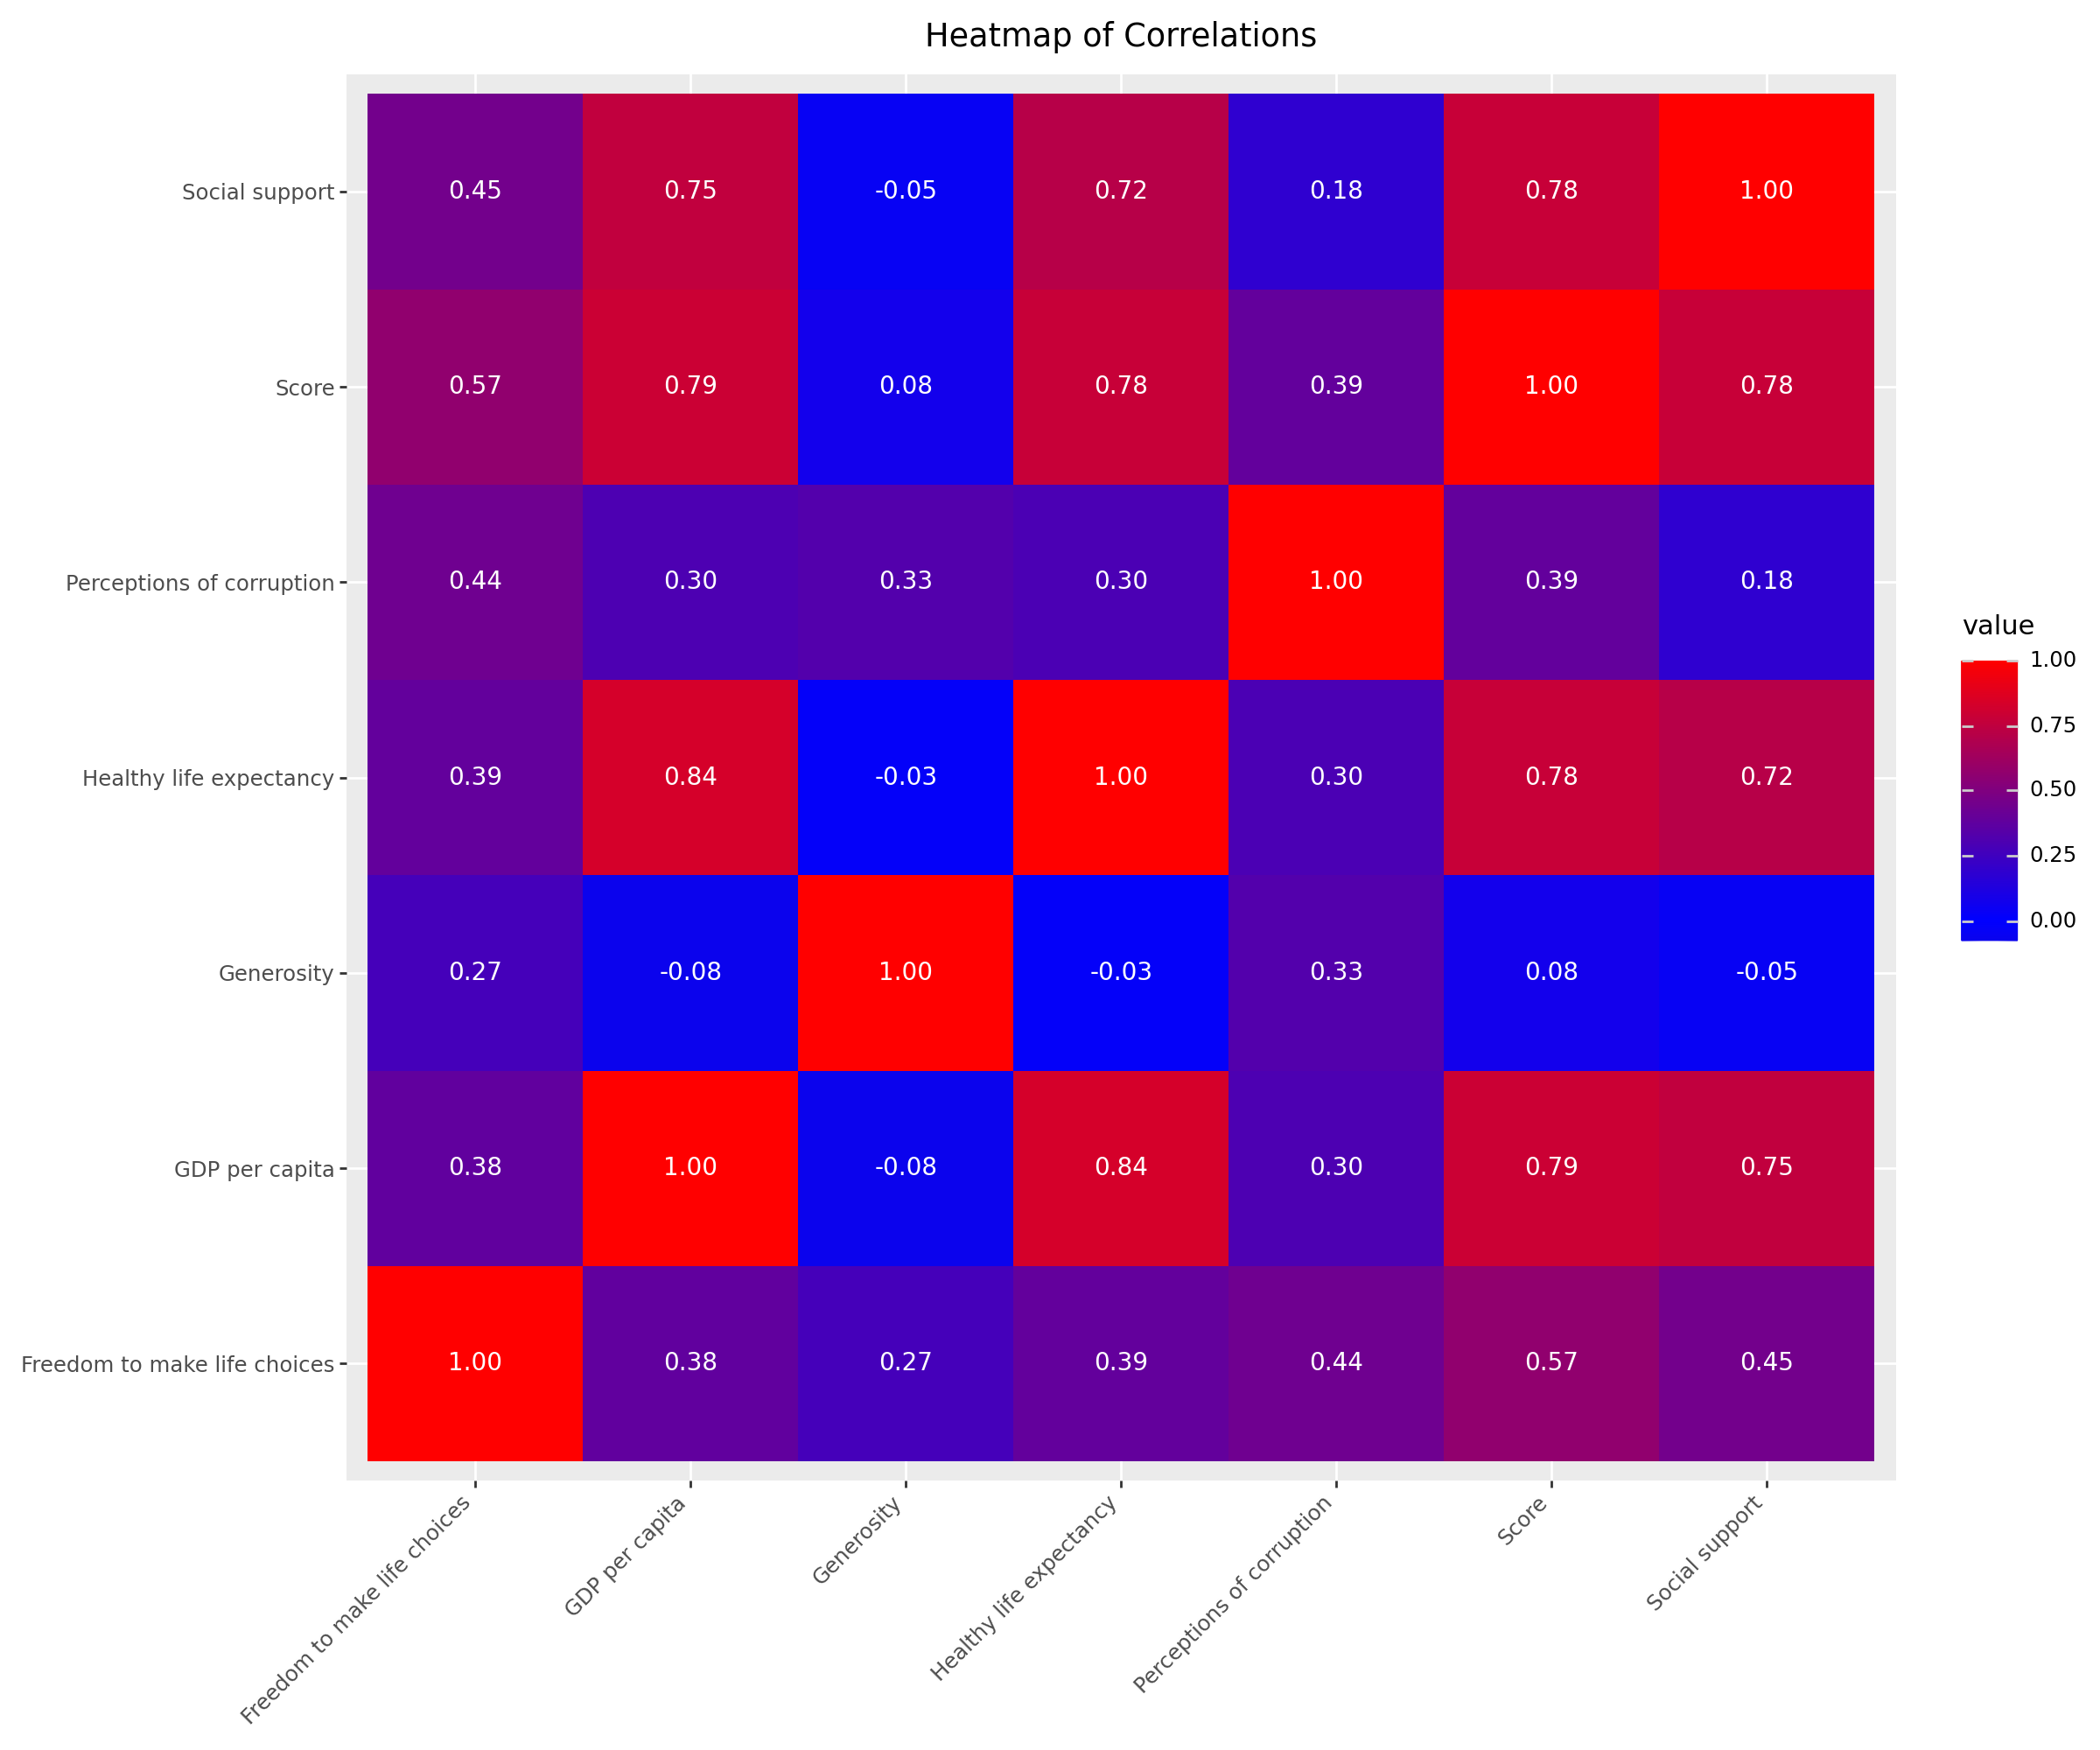

In [7]:
# first need a correlation matrix
numerical_columns = ['Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
# df = df[numerical_columns]
correlation_matrix = df_2019[numerical_columns].corr()

# # heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Heatmap of Correlations')
# plt.show()

# for plotnine we need to convert the correlation matrix to a long-format DataFrame
correlation_matrix_long = correlation_matrix.reset_index().melt(id_vars='index', var_name='variable', value_name='value')

(ggplot(correlation_matrix_long, aes(x='variable', y='index', fill='value'))
 + geom_tile()
 + geom_text(aes(label='value'), color='white', size=10, format_string='{:.2f}') # for the values
 + scale_fill_gradient2(mid="blue", high="red", midpoint=0)
 + theme(axis_text_x=element_text(rotation=45, hjust=1),
         figure_size=(12, 10))
 + labs(title='Heatmap of Correlations', x='', y='')
)

### Correlation Value Classification

| Correlation Strength   | Positive Correlation | Negative Correlation |
|------------------------|----------------------|----------------------|
| Strong                 | 0.7 to 1.0           | -0.7 to -1.0         |
| Moderate               | 0.5 to 0.7           | -0.5 to -0.7         |
| Weak                   | 0.3 to 0.5           | -0.3 to -0.5         |
| Very Weak / No Correlation | -0.3 to 0.3       | -0.3 to 0.3          |

In the correlation matrix heatmap, all statistically significant correlations are positive. The main features to highlight are:

* **Happiness Score**: Weakly correlated with perceptions of corruption, moderately correlated with the freedom to make life choices, and strongly correlated with healthy life expectancy, social support, and GDP per capita. These correlations indicate how much each factor influences people's happiness. It is worth noting that generosity does not present a significant correlation with the happiness index. In simpler terms, the primary (and highly determinant) factors contributing to happiness are wealth, social support, and healthy life expectancy.

* **GDP/capita**: Weakly correlated with perceptions of corruption; in general, a wealthy country may not exhibit high levels of corruption, but this is not necessarily the case. It is also weakly correlated with the freedom to make life choices; wealth provides some degree of freedom to individuals but is not a determining factor. However, GDP per capita is strongly correlated with healthy life expectancy and social support, making it a significant factor influencing these conditions.

Due to limited time, there are other fields that we will not be emphasize but are left for the reader to examine.

Having examined the main correlations, we proceed now to the region-seggregated pariplot. Here we can now focus on general trends and distributions:

In [8]:
# df_2019.columns

cols_to_plot = ['Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Region']

df_2019_plot = df_2019[cols_to_plot].copy()

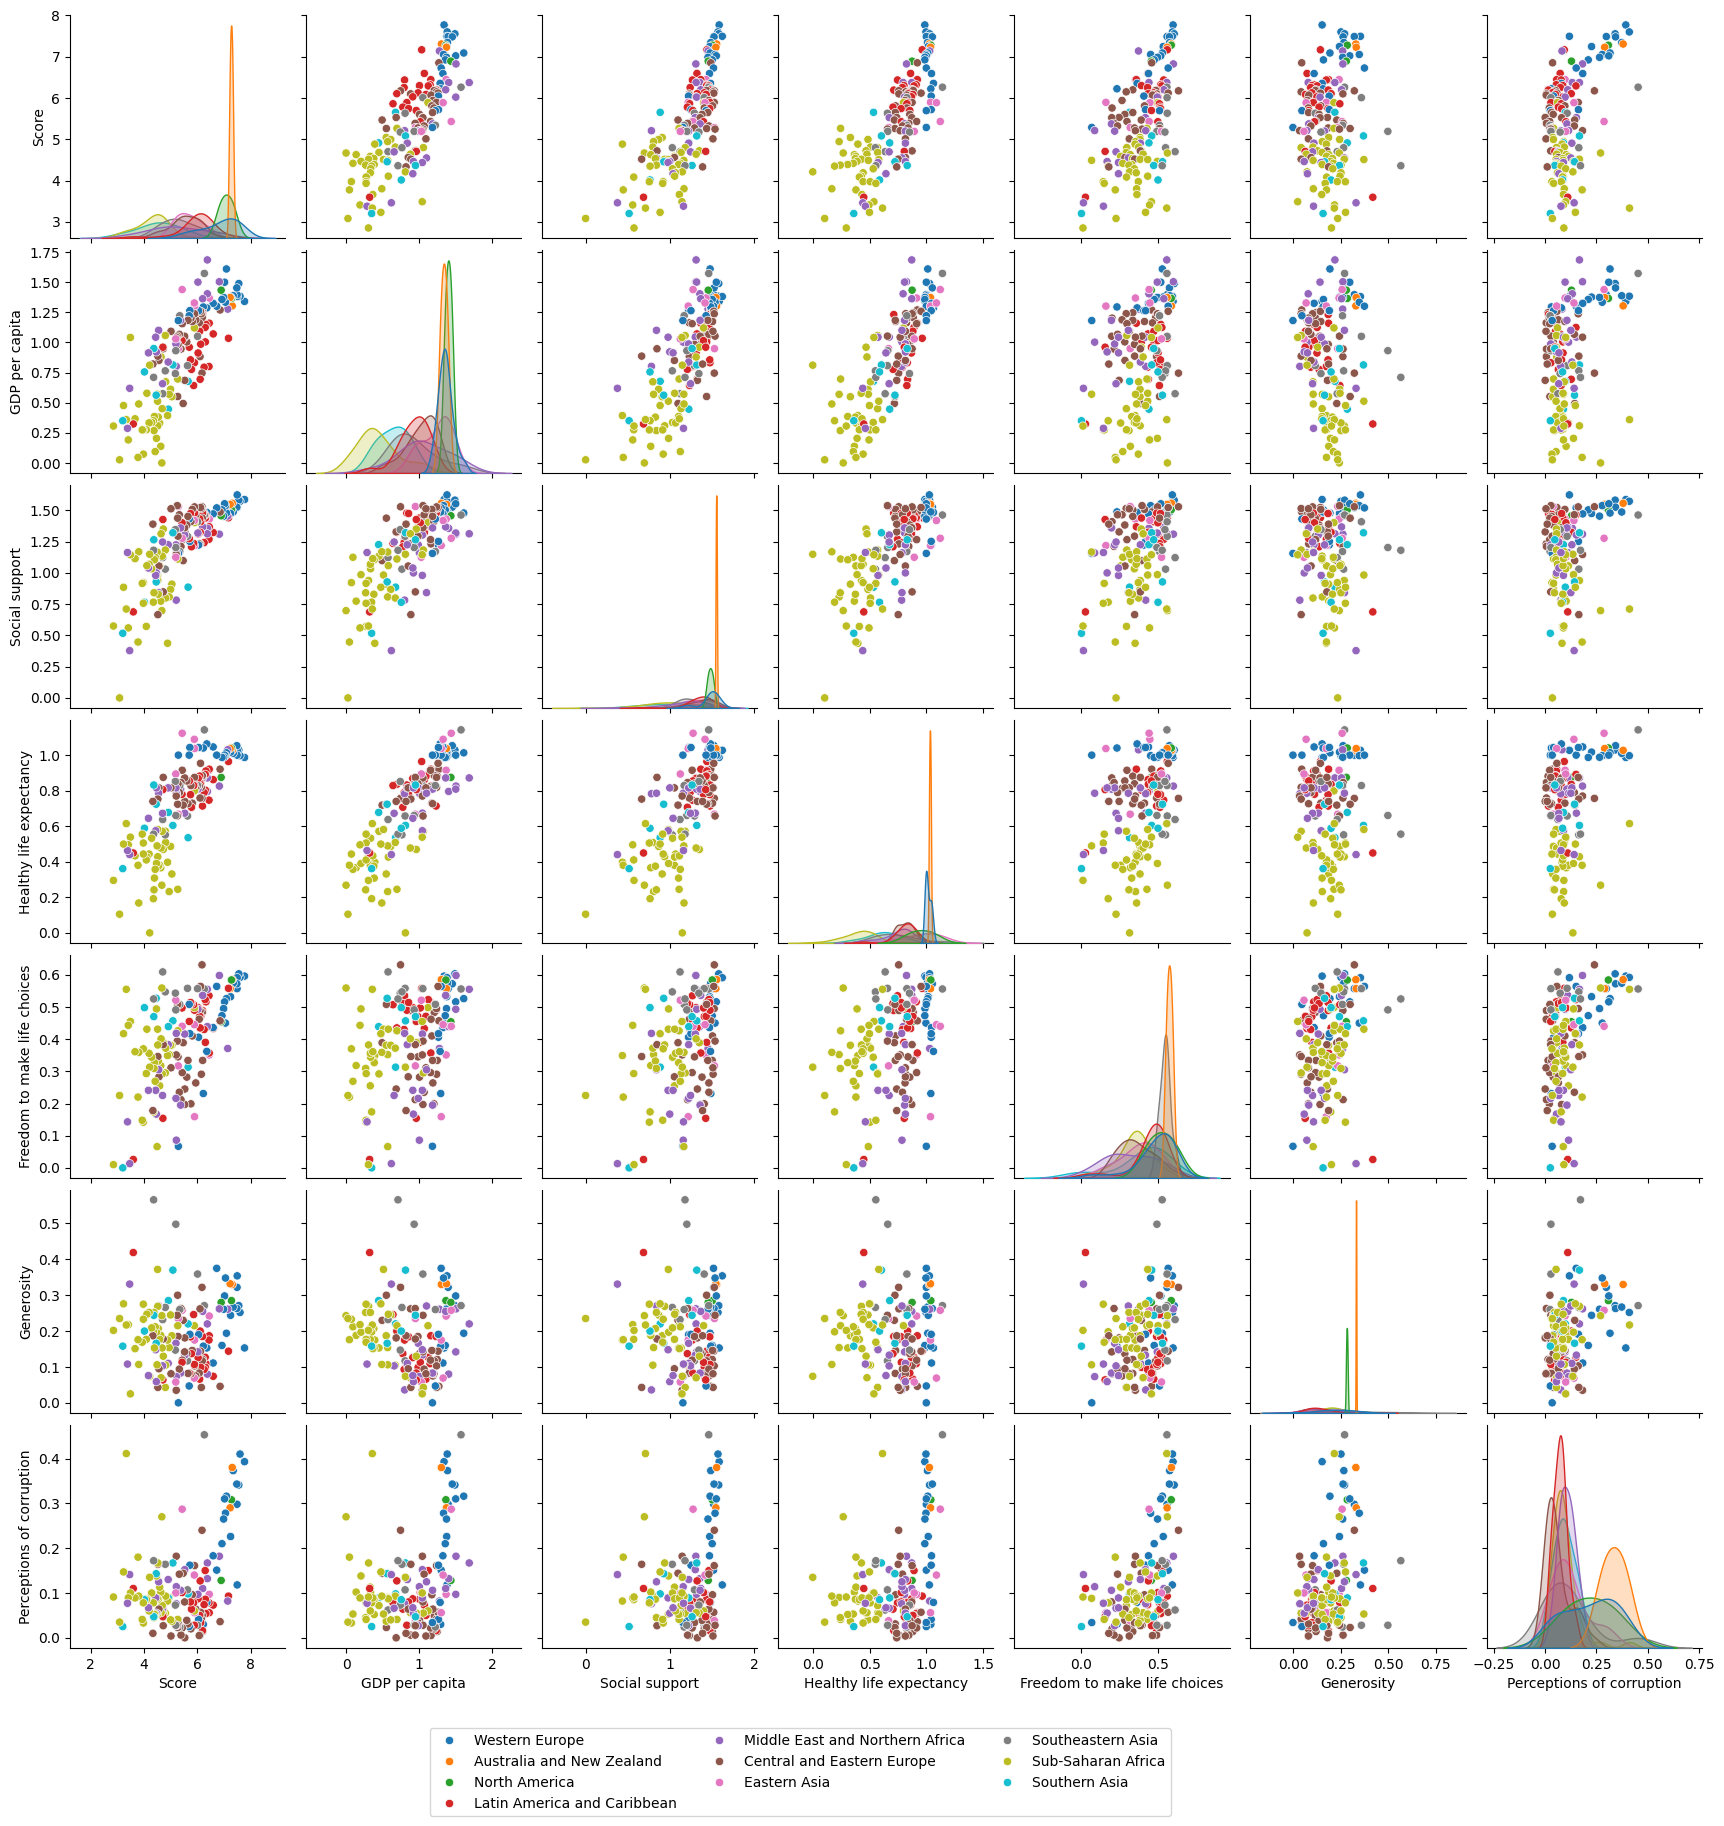

In [9]:
# we'll make a workaround to show the legend below the plot

# create the pairplot, kdes normalized individually
g = sns.pairplot(df_2019_plot, hue='Region', diag_kind='kde', diag_kws={'common_norm': False})

# remove the default legend
g._legend.remove()

# create a custom legend below the plot
g.fig.legend(handles=g._legend_data.values(), labels=g._legend_data.keys(), loc='lower center', ncol=3, bbox_to_anchor=(0.4, -0.05))

# adjust the bottom margin to accommodate the legend
plt.subplots_adjust(bottom=0.05)

# releases the kraken
plt.show()

That is a lot of information all at once, so let`s take a deep breath and make a general view. After that we'll apply more granularity for the details.

In the pairplot, a notable detail is the extreme kurtosis observed in Australia and New Zealand: both countries are extremely similar in terms of their happiness scores. Similarly, North America, represented by Canada and the USA, also shows a strong resemblance, though not as pronounced as that of Australia and New Zealand.

There are no distinctly separated clusters by region; all regional clusters exhibit significant overlap. However, Western Europe tends to show its own trends. For example, social support, GDP per capita, and healthy life expectancy appear to be independent (constant horizontal line-arrange) in relation to the corruption index. In contrast, for the other regions, the trend is inverted: the corruption index tends to remain constant (a horizontal dispersed band) with respect to the aforementioned factors.

The happiness score varies significantly from region to region, which is logical: the happiness index of a region composed of two high-GDP per capita countries will not be the same as that of a larger, more dispersed region.

The regions with the highest GDP per capita include North America, Australia and New Zealand, and Western Europe. Eastern Asia also ranks highly but presents a right-skewed distribution. At the other extreme is Sub-Saharan Africa.

North America, Australia and New Zealand, and Western Europe have high score modes for social support, life expectancy, and freedom to make life choices.

The perceptions of corruption index is very good good only for Australia and New Zealand, medium for North America and Western Europe, while other regions tend to have lower rankings in this regard.

### Happiness Strong Correlations Analysis:

The strongly correlated fields with hapiness score are social support, GDP/capita and healthy life expectancy

y = 2.89x + 1.91
R^2 = 0.60


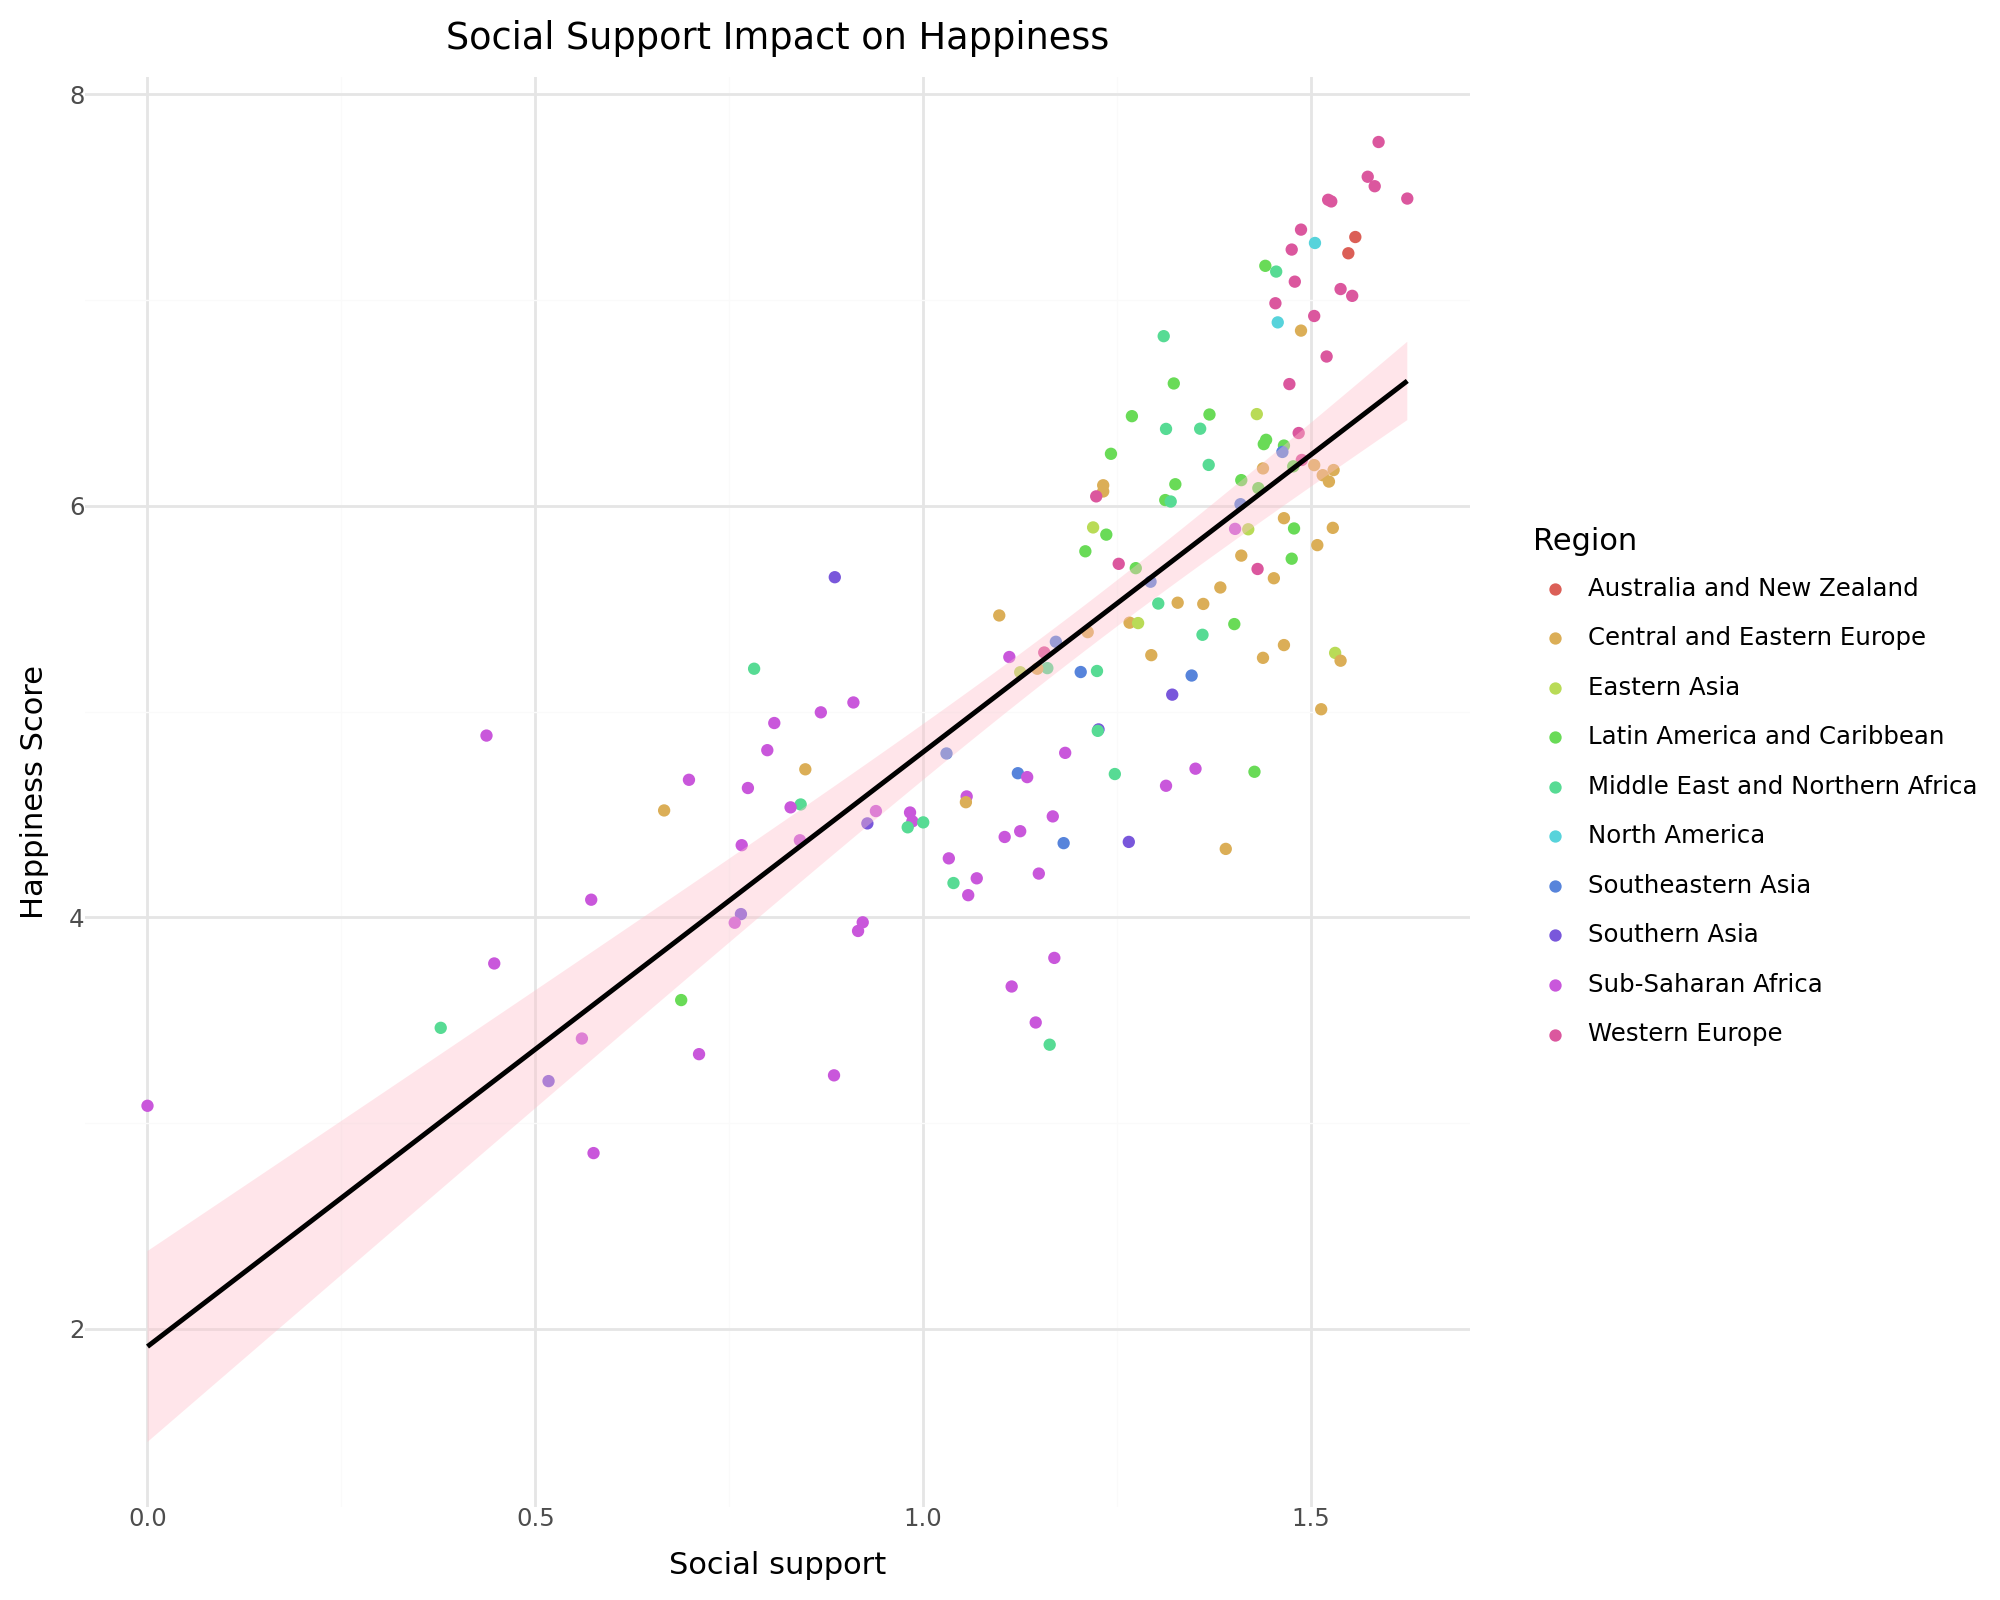

In [10]:
# linear regression model
X = df_2019[['Social support']]
y = df_2019['Score']
model = LinearRegression()
model.fit(X, y)

# predict
y_pred = model.predict(X)

# slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# R-squared value
r_squared = model.score(X, y)
# trend line equation string
print(f'y = {slope:.2f}x + {intercept:.2f}\nR^2 = {r_squared:.2f}')


(ggplot(df_2019, aes(x='Social support', y='Score', color='Region'))
    # + geom_point(color='blue')  # Set the point color to blue
    + geom_point()
    + geom_smooth(method='lm', color='black', fill='pink')
    + labs(title='Social Support Impact on Happiness',
           x='Social support',
           y='Happiness Score',
           color='Region',)
    # + scale_color_manual(values=["blue", "green", "red"])
    + theme_minimal()
    + theme(figure_size=(10, 8))
)

y = 3.59x + 2.81
R^2 = 0.61


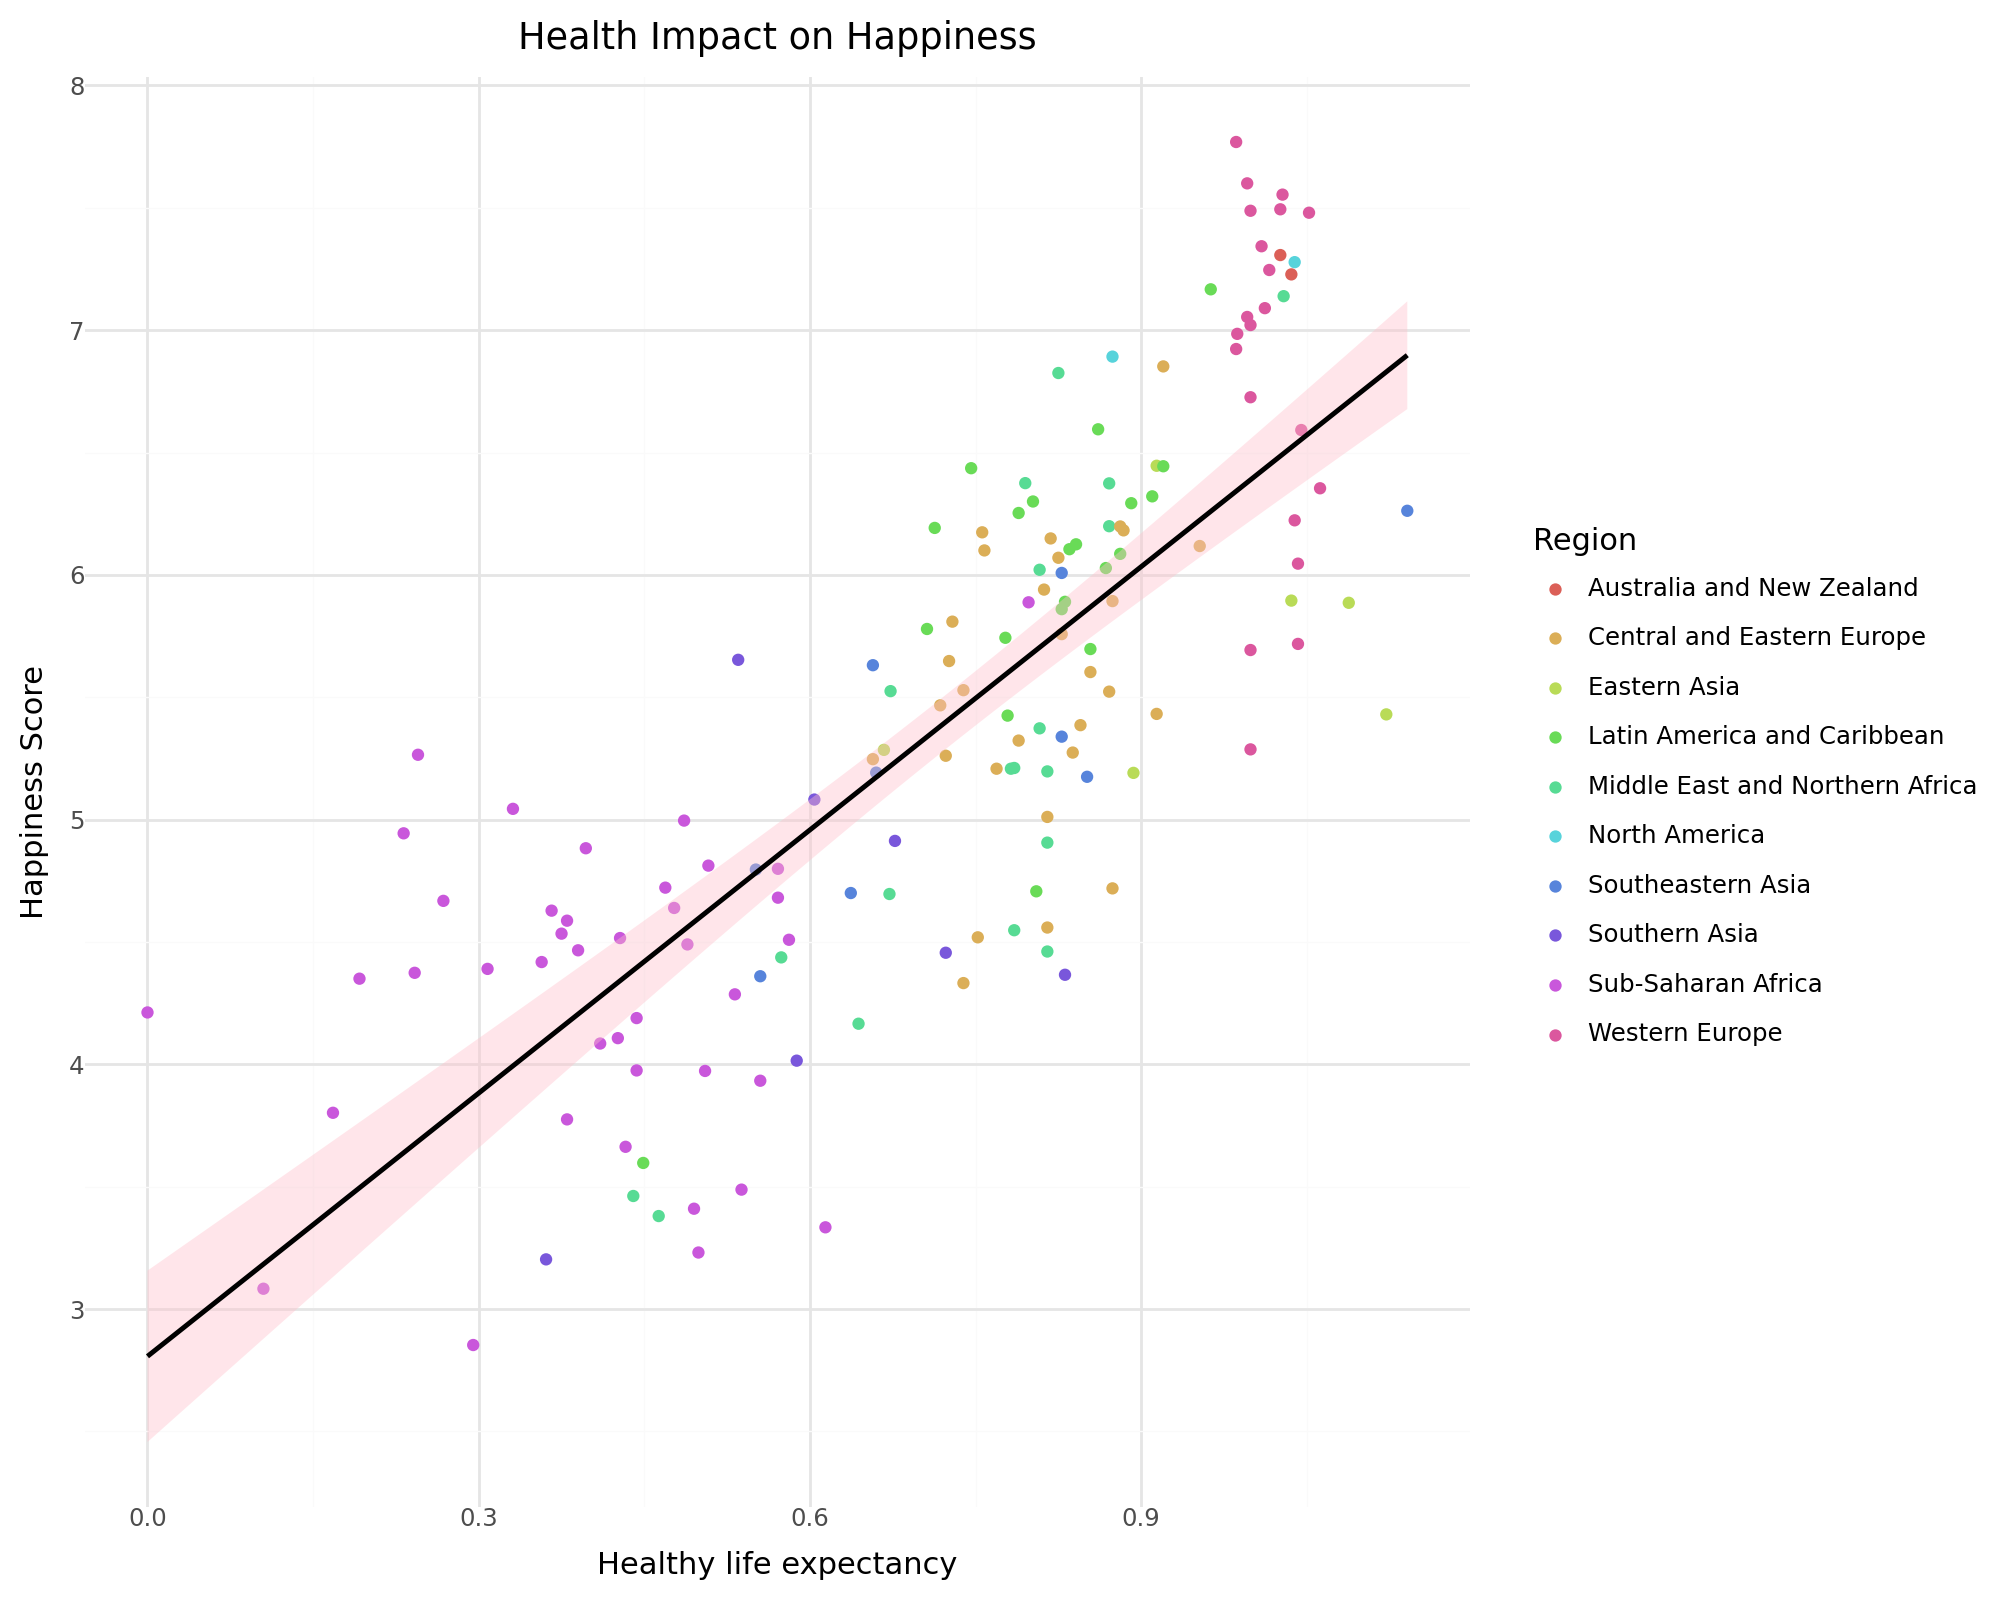

In [11]:
# linear regression model
X = df_2019[['Healthy life expectancy']]
y = df_2019['Score']
model = LinearRegression()
model.fit(X, y)

# predict
y_pred = model.predict(X)

# slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# R-squared value
r_squared = model.score(X, y)
# trend line equation string
print(f'y = {slope:.2f}x + {intercept:.2f}\nR^2 = {r_squared:.2f}')


(ggplot(df_2019, aes(x='Healthy life expectancy', y='Score', color='Region'))
    # + geom_point(color='blue')  # Set the point color to blue
    + geom_point()
    + geom_smooth(method='lm', color='black', fill='pink')
    + labs(title='Health Impact on Happiness',
           x='Healthy life expectancy',
           y='Happiness Score',
           color='Region',)
    # + scale_color_manual(values=["blue", "green", "red"])
    + theme_minimal()
    + theme(figure_size=(10, 8))
)

y = 2.22x + 3.40
R^2 = 0.63


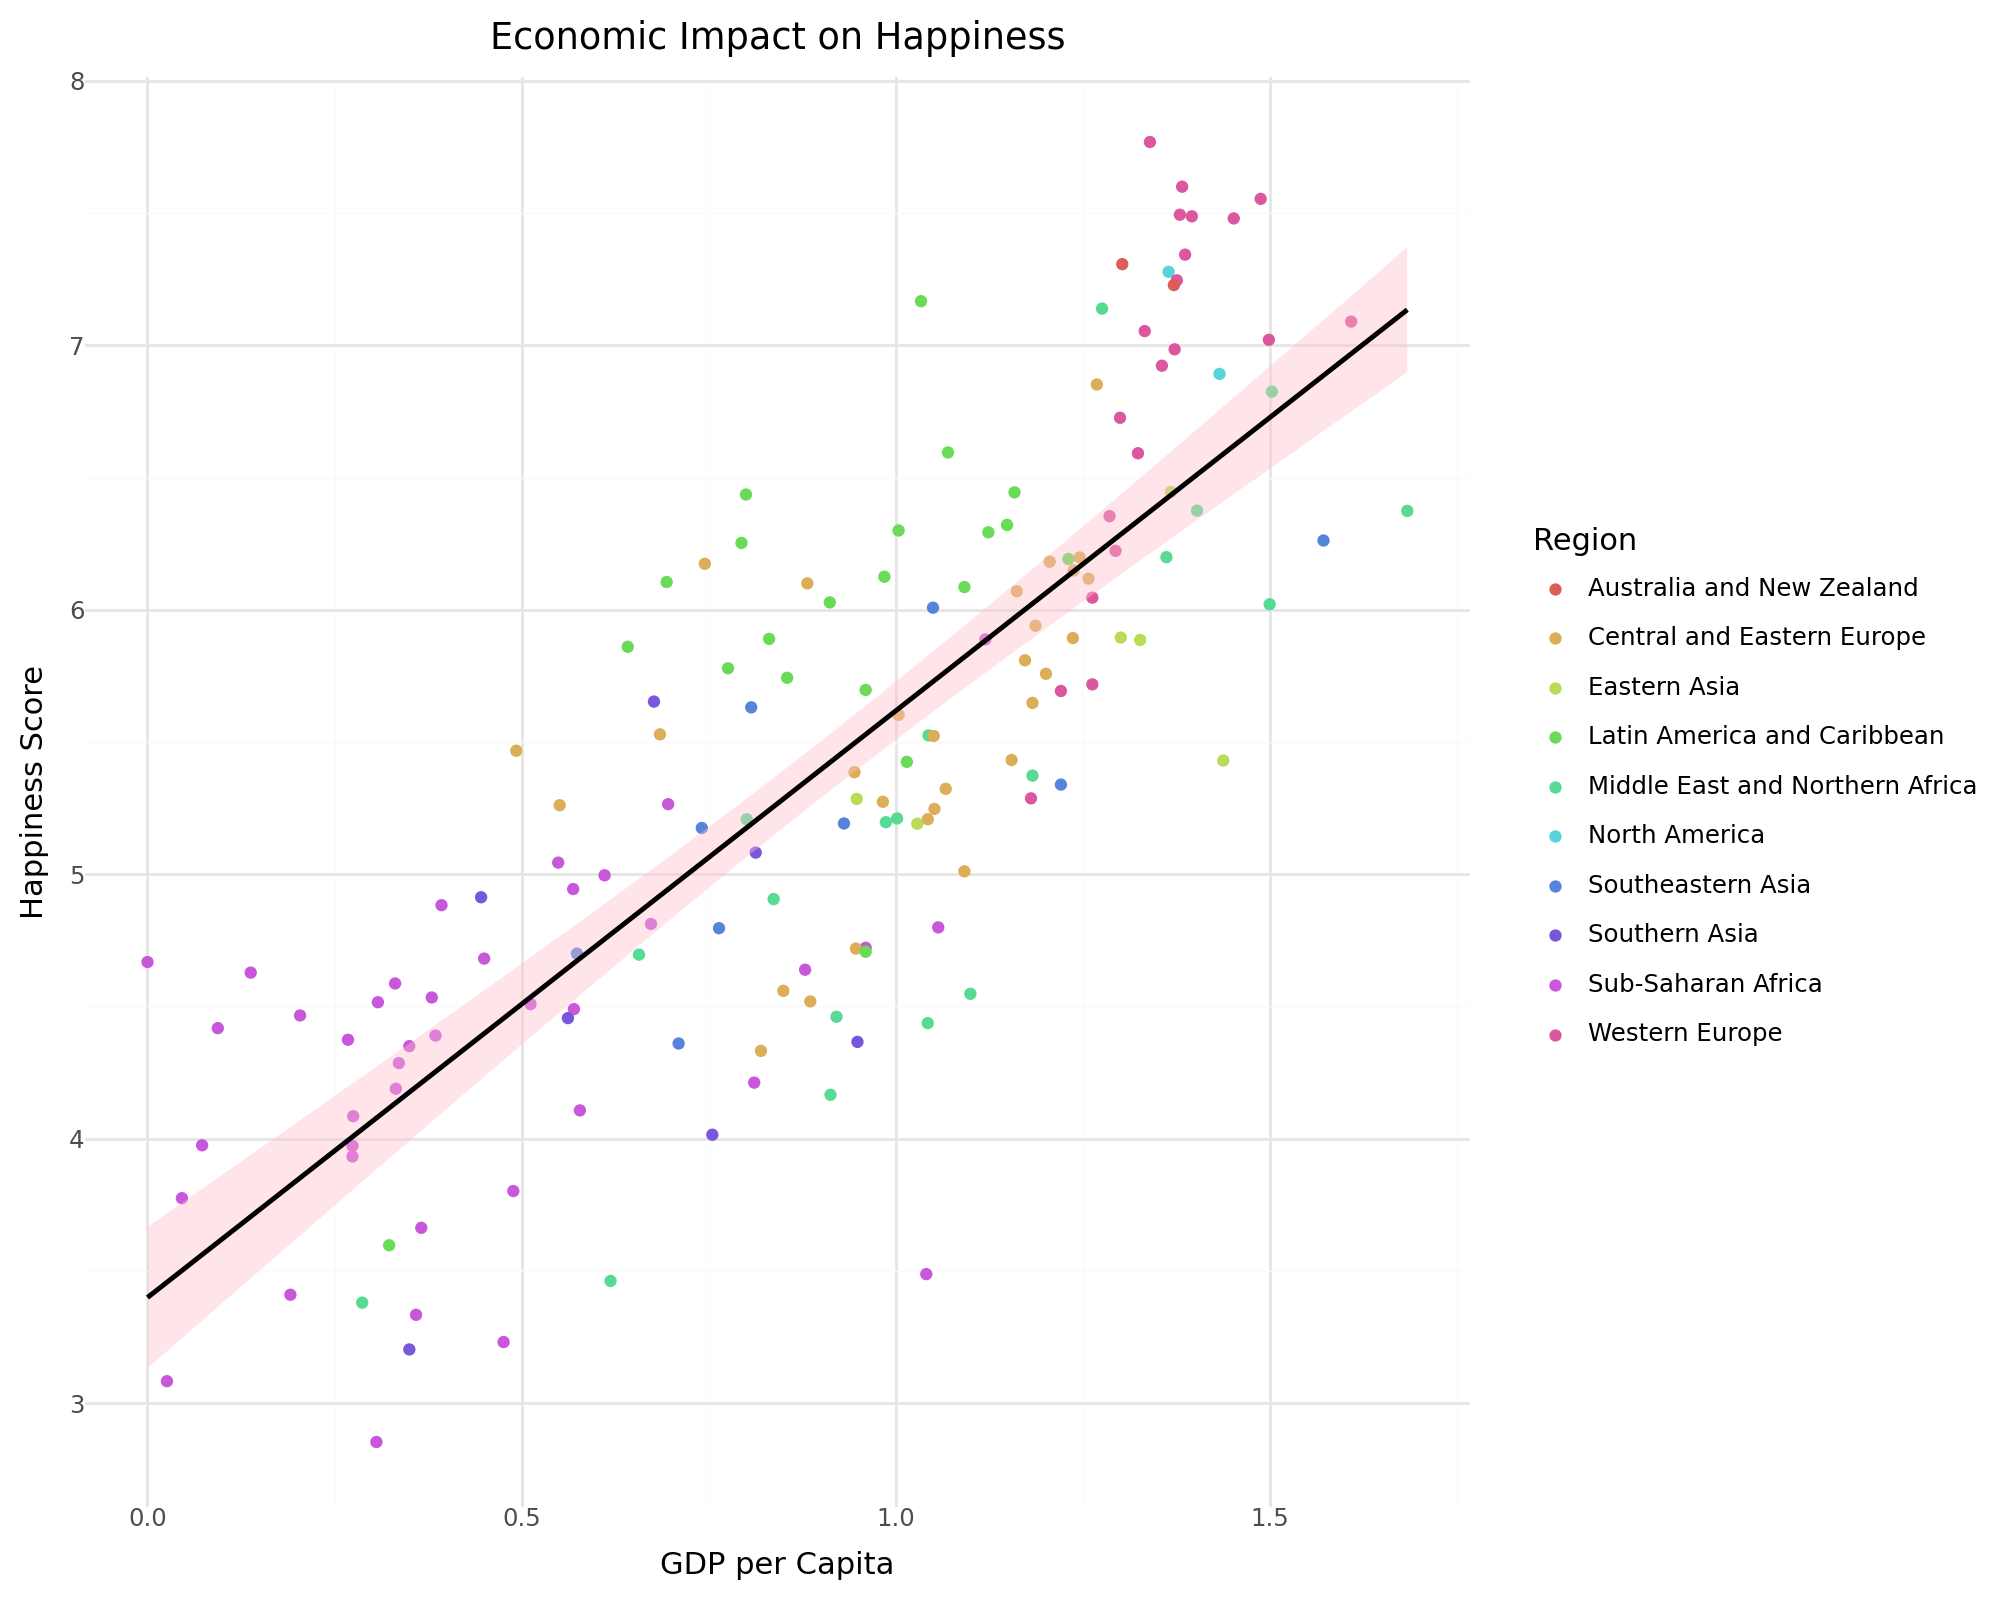

In [12]:
# linear regression model
X = df_2019[['GDP per capita']]
y = df_2019['Score']
model = LinearRegression()
model.fit(X, y)

# predict
y_pred = model.predict(X)

# slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
# R-squared value
r_squared = model.score(X, y)
# trend line equation string
print(f'y = {slope:.2f}x + {intercept:.2f}\nR^2 = {r_squared:.2f}')


(ggplot(df_2019, aes(x='GDP per capita', y='Score', color='Region'))
    # + geom_point(color='blue')  # Set the point color to blue
    + geom_point()
    + geom_smooth(method='lm', color='black', fill='pink')
    + labs(title='Economic Impact on Happiness',
           x='GDP per Capita',
           y='Happiness Score',
           color='Region',)
    # + scale_color_manual(values=["blue", "green", "red"])
    + theme_minimal()
    + theme(figure_size=(10, 8))
)

In the scatter plots, we can appreciate some linear trend between the happiness score and the social support, GDP/capita and Healthy life expectancy. We appreciate a positive correlation, althoug there is some scattering in the charts and the linear regression model only explains ~60% of the points (R=0.6), which is not that bad.

So we can infer while social support, GDP/capita and healthy life expectancy are important factor influencing happiness, it is not the sole determinant individually.


## Visualization with Plotnine:

* Global Happiness Scores: Create a bar chart of happiness scores across countries.
* Economic Impact on Happiness: Use a scatter plot to explore the relationship between GDP per capita and happiness scores. (done in previous section)
* Regional Comparisons: Generate boxplots to compare happiness scores across regions.
* Correlation Heatmap: Visualize the correlation between different factors using a heatmap. (done in previous section)


### Global Happiness Scores
This is a highly unreadable plot when we take all the countries, to put some order we can order by happiness score and divide by region.

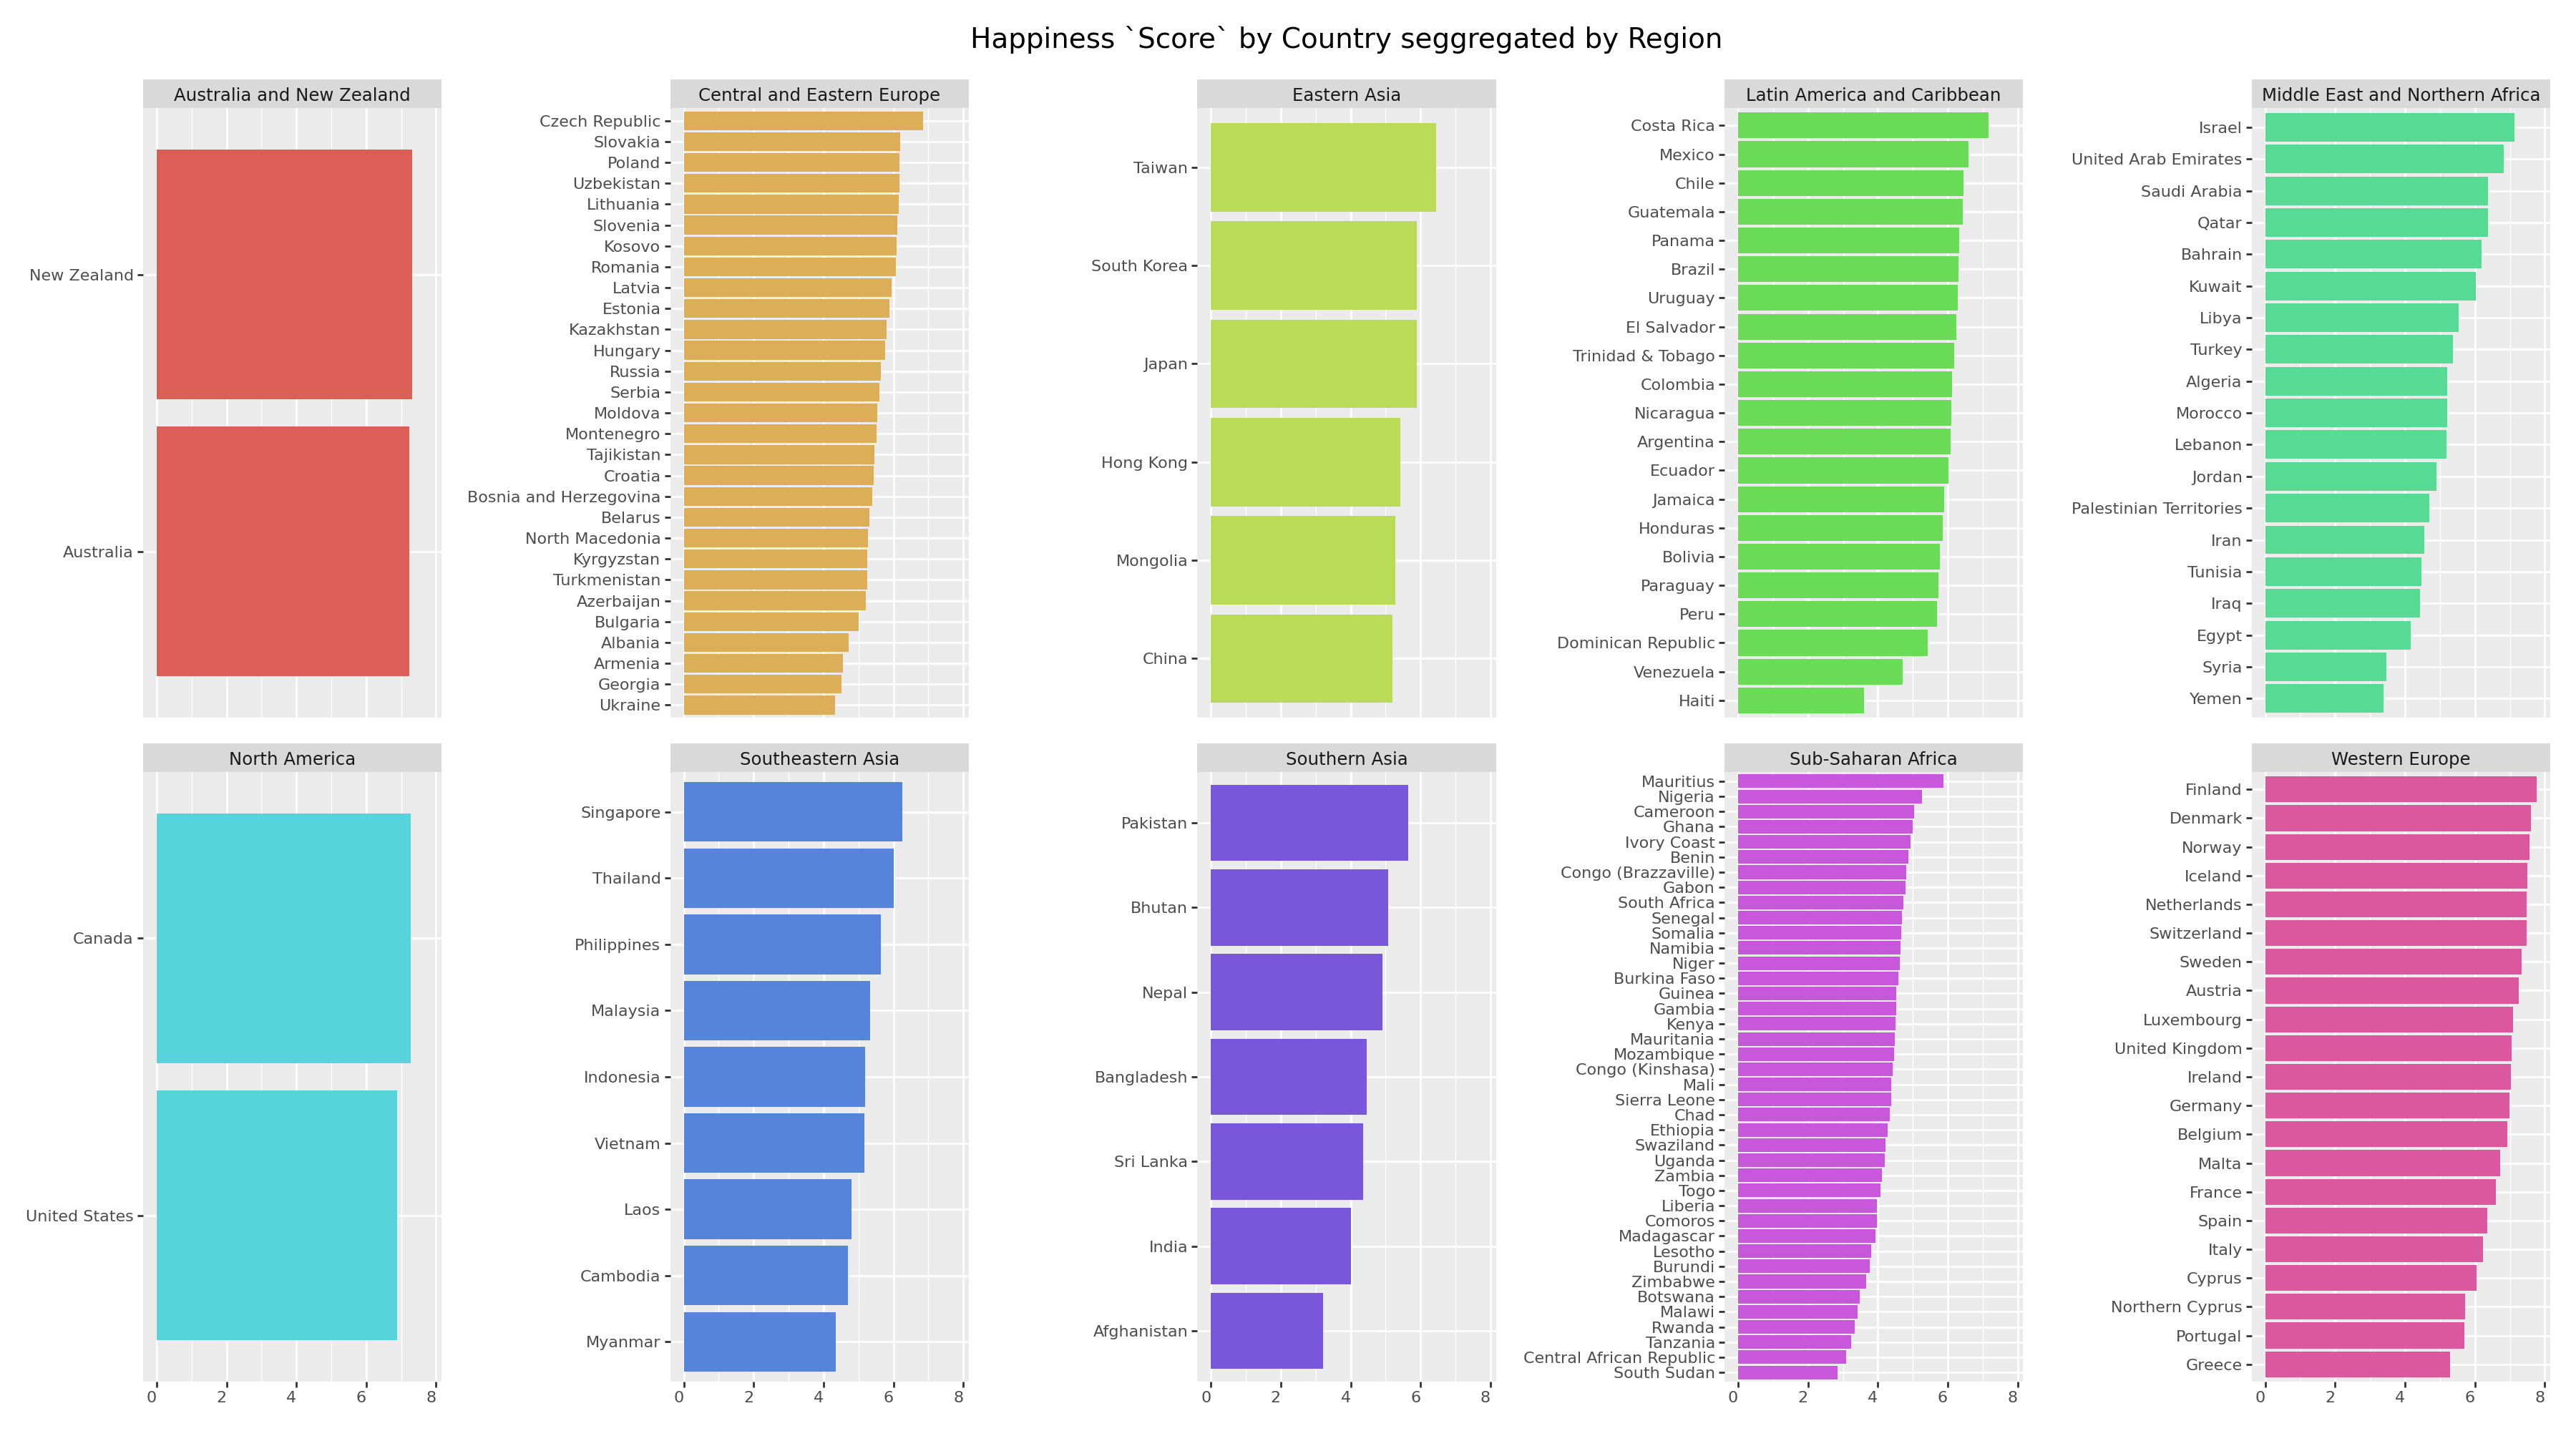

In [13]:
# df_2019_sorted = df_2019.sort_values(by='Score', ascending=False) # this doesnt work \
# we need to reorder INSIDE aes

(ggplot(df_2019, aes(x='reorder(Country, Score)', y='Score', fill='Region')) # here to change order
 + geom_col()
 + coord_flip() # horizontal bars
 + labs(title='Happiness `Score` by Country seggregated by Region', x='', y='', fill='Region')
 + theme(axis_text_x=element_text(rotation=0, hjust=1, size=8),  # x-axis label size
         axis_text_y=element_text(size=8),  # y-axis label size
         plot_title=element_text(size=14),  # plot title size
         legend_text=element_text(size=10),  # legend text size
         figure_size=(18, 10),
         legend_position='none') # remove legend
 + facet_wrap('~Region', scales='free_y', ncol=5, nrow=2)
)

From the column plot by region, we observe that North America and Australia & New Zealand have high happiness scores with minimal variation. This trend is also seen, although to a lesser extent, in Eastern Asia, Western Europe, and Southern Asia (in that order).

In contrast, for the other regions, there is significant variability in happiness scores between countries, with the maximum score being nearly double that of the lowest-scored country. This trend highlights a considerable disparity among countries within the same region.

### Regional Comparisons

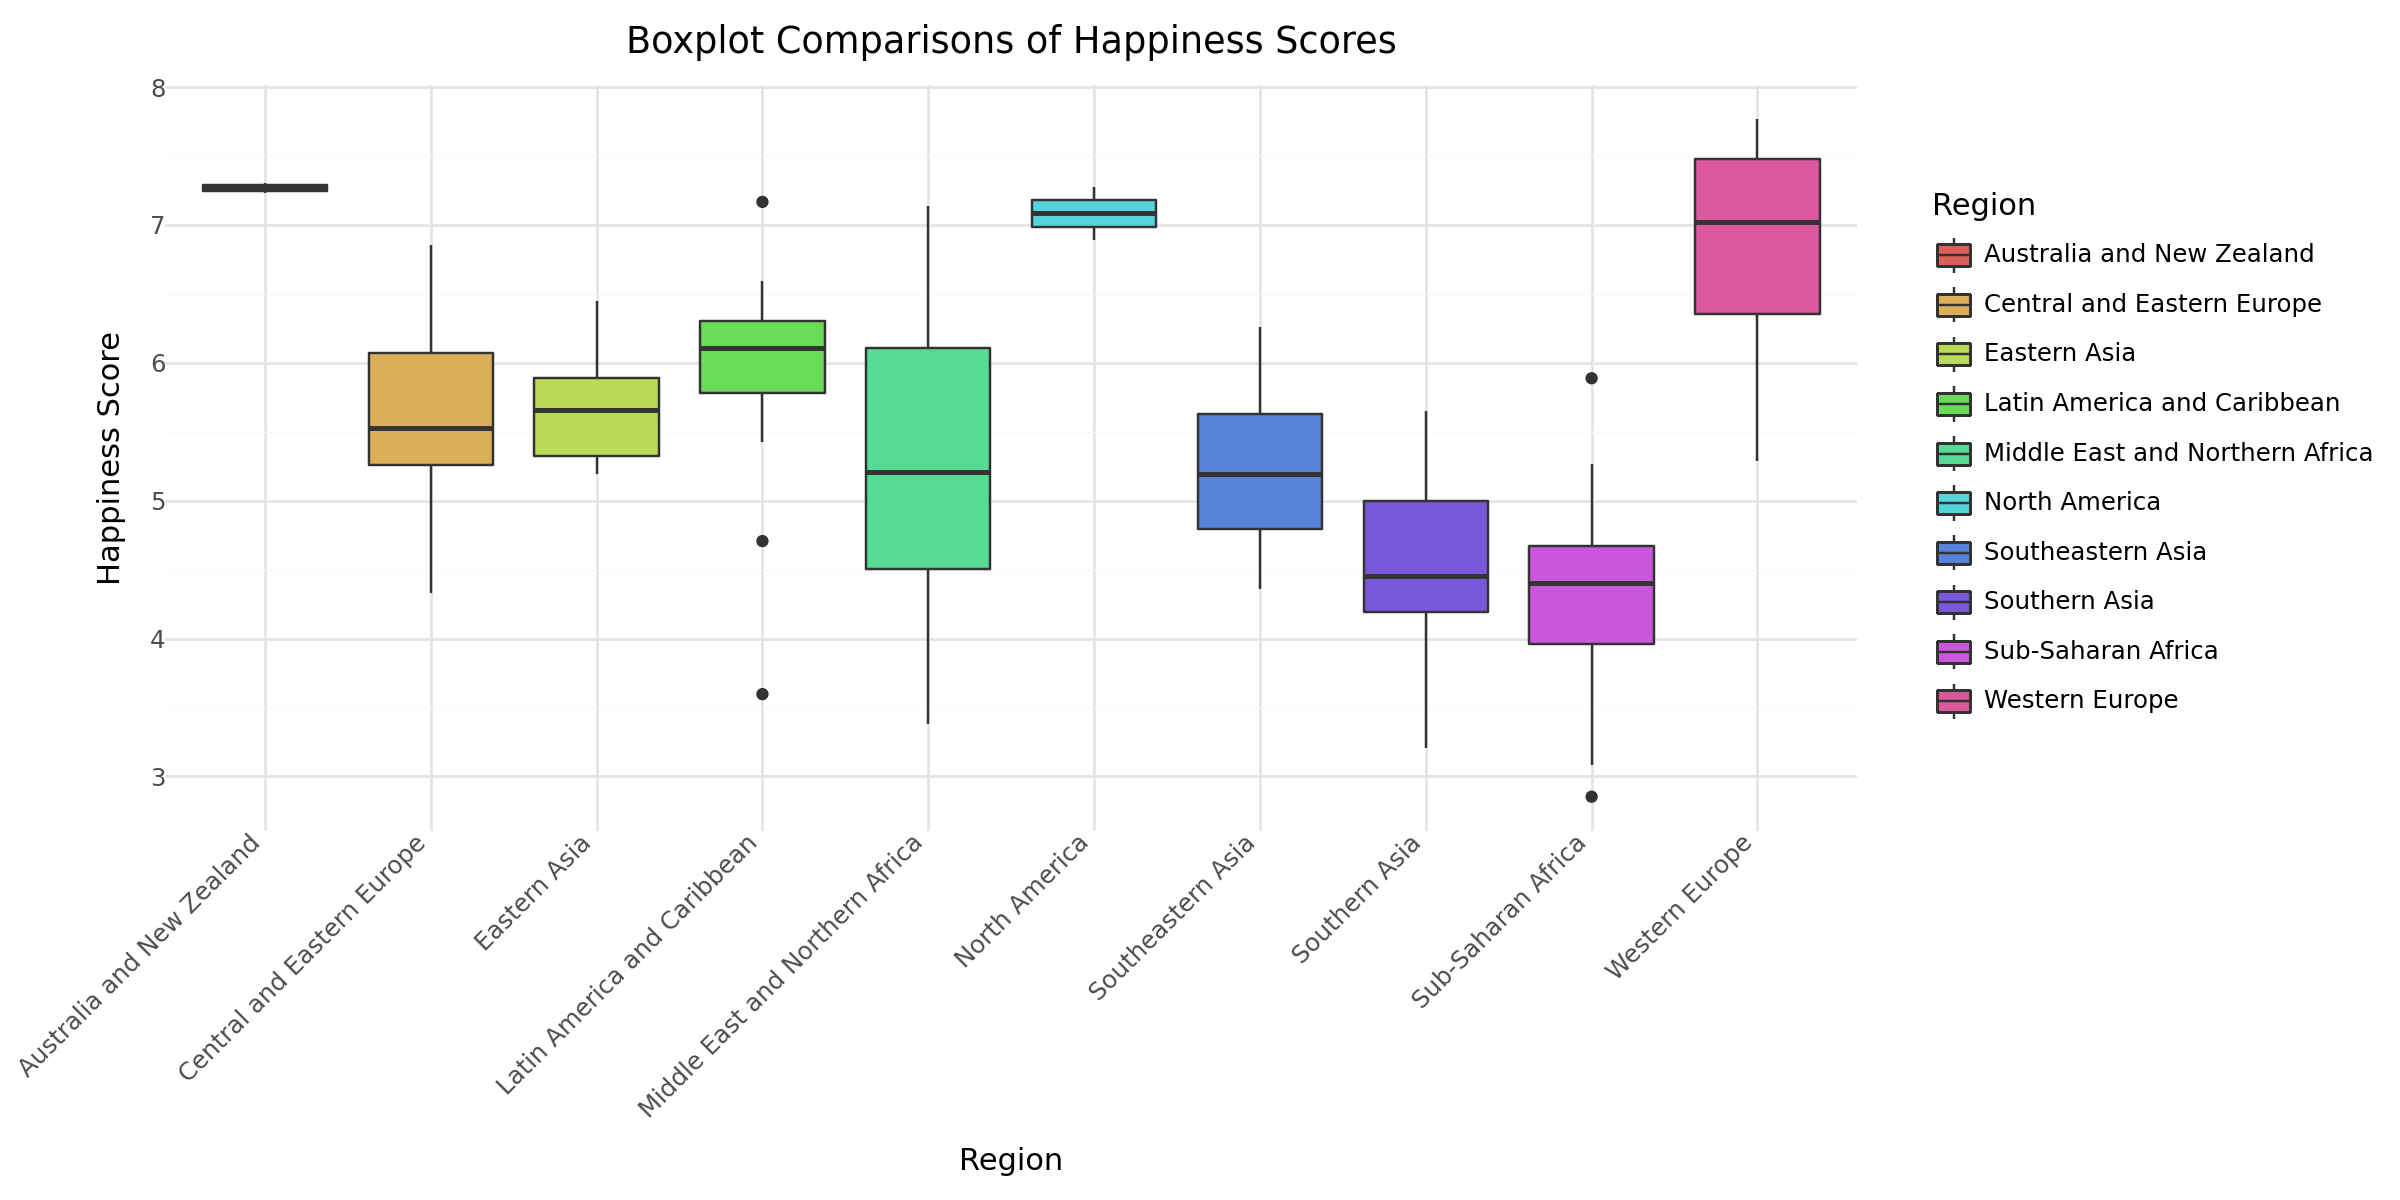

In [16]:
(ggplot(df_2019, aes(x='Region', y='Score', fill='Region'))
    + geom_boxplot()
    + labs(title='Boxplot Comparisons of Happiness Scores', x='Region', y='Happiness Score')
    + theme_minimal()
    + theme(axis_text_x=element_text(rotation=45, hjust=1), figure_size=(12, 6))
)

From the boxplots, we observe how different the happiness score distributions are by country for the various regions.

The happiest regions are Australia & New Zealand, North America, and Western Europe, with minimal variation in their happiness scores. The most dispersed region is the Middle East & Northern Africa, indicating significant disparity among the countries within this region. The least happy region is Sub-Saharan Africa, where it is noticeable that, despite having the largest sample size (the number of countries), its dispersion falls within a middle range.

The happiest country is found in Western Europe, while the least happy country is located in Sub-Saharan Africa. It is left for the reader to identify these countries.

In this context, each outlier represents a country that stands out due to its exceptionally high or low happiness score compared to its regional distribution levels. Latin America & the Caribbean has one outlier with a happiness score at the median level of Western Europe. Additionally for this region, there are two outliers that are so unhappy that they align with the score level of Sub-Saharan Africa. Finally, Sub-Saharan Africa has one outlier that is as happy as the lower range in Western Europe and also possesses an outlier that represents the lowest happiness score in the world. Again, it is left for the reader to find these specific countries.

## Interactive Visualizations with Plotly:

* Interactive World Map: Create an interactive map displaying happiness scores across different countries.
* Dynamic Scatter Plot: Plot an interactive scatter plot exploring relationships between various factors like health, freedom, and happiness.
* Factor Analysis: Use a bubble chart to visualize the impact of social support and generosity on happiness scores, with bubble size representing country population.


### Interactive World Map

In [17]:
fig = px.choropleth(df_2019,
                    locations="Country",
                    locationmode='country names',
                    color="Score",
                    hover_name="Country",
                    hover_data=["Region"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="World Happiness Scores 2019")
fig.show()

From the interactive world map plot, we observe an interesting fact: in general, the happiness score gradient is not extreme between neighboring countries. That is, neighboring countries can have different scores, but the change does not tend to be drastic. This trend does not hold for the Australia & New Zealand region and Indonesia, and most notably between the happiest country in the world, Finland (score = 7.769), and Russia (score = 5.648).

### Dynamic Scatter Plot

In [18]:
fig = px.scatter(df_2019,
                 x="Healthy life expectancy",
                 y="Freedom to make life choices",
                 color="Score",
                 hover_name="Country",
                 title="health, freedom, and happiness interactive scatter plot")
fig.show()

From the dynamic scatter plot, we again observe the positive correlation between happiness score and both healthy life expectancy and freedom to make life choices.

In contrast, between healthy life expectancy and freedom to make life choices, we see general scattering without a discernible trend.

### Factor Analysis

In [19]:
fig = px.scatter(df_2019,
                 x="Social support",
                 y="Generosity",
                 color="Score",
                 size="GDP per capita",
                 hover_name="Country",
                 title="bubble chart of Social support and Generosity on happiness score and GDP/capita")
fig.show()

Due lack of time to make a propper tables join for adding country population into the df_2019 dataframe, we applied GDP/capita as size factor. The countries population can be found in the [Our World in Data](https://ourworldindata.org/) webpage.

The bubble chart adds two more dimensions (color and size) to the 2D scatter plot of generosity vs social support. On the two last named fields we observe a general scattered cluster with two noticeable outliers: Central Africa Republic (lowest social support) and Myanmar (highest generosity in the world).

In what concerns to happiness score and GDP/capita, ther biggest values tend to be found on the right side (positivelly correlated to social support); while generosity doesnt present an observable correlation with them (as mentioned in other plots).

### Advanced Analysis:

* Perform a multi-variable analysis and visualize it using an interactive Plotly chart.
* Explore time-series aspects if temporal data is available, or compare with another year`s dataset.


In [20]:
# separate pertinent columns for multivariate analysis
df_3d = df_2019[['GDP per capita', 'Healthy life expectancy', 'Score']].copy()
df_3d['year'] = 2019

# create temporal df with same fields from another year
df_temp = pd.read_csv('/content/2016.csv')
df_temp['year'] = 2016
df_temp.rename(columns={'Economy (GDP per Capita)': 'GDP per capita',
                        'Health (Life Expectancy)': 'Healthy life expectancy',
                        'Happiness Score': 'Score'},
                        inplace=True
               )

# concatenate the dataframes
df_3d = pd.concat([df_3d, df_temp[['GDP per capita', 'Healthy life expectancy', 'Score', 'year']]], ignore_index=True)


# display(df_3d.head())
# display(df_3d.tail())

In [21]:
fig = px.scatter_3d(df_3d,
                    x='GDP per capita',
                    y='Healthy life expectancy',
                    z='Score',
                    color='year',
                    title='multi-variable analysis (2016 in blue, 2019 in yellow)',
                    labels={'GDP per capita': 'GDP per Capita',
                            'Healthy life expectancy': 'Healthy Life Expectancy',
                            'Score': 'Happiness Score'},
                    # color_discrete_map={'2016': '#4C72B0',  # Assign color for 2016
                    #                     '2019': '#DD8452'}
                    )


# hide the color bar (optional):
fig.update_layout(coloraxis_showscale=False)

fig.show()

In the 3D scatter plot, we observe two distinctive clusters: one for 2016 (in blue) and another for 2019 (in yellow), with moderate overlap between them. The displacement between these clusters is primarily attributed to an increase in the "Healthy Life Expectancy" metric. There is no appreciable happiness score change between those two years.

---
## Conclusions

Based on the observations from the analysis on the `World Happiness Report Dataset` (year 2019), several key conclusions can be drawn regarding the relationships between happiness scores and various influencing factors across different regions.

### Correlation Insights

1. **Key Determinants of Happiness**:
   - The **Happiness Score** is strongly correlated with:
     - **Healthy Life Expectancy**
     - **Social Support**
     - **GDP per Capita**
   - These factors are pivotal in determining happiness levels, indicating that wealth, health, and community support significantly influence overall well-being.
   - In contrast, **Generosity** does not show a significant statistical correlation with happiness, suggesting that altruistic behaviors may not directly impact individual happiness levels (and vice-versa).

2. **GDP per Capita Relationships**:
   - GDP per capita shows weak correlations with perceptions of corruption and freedom to make life choices, indicating that while wealth contributes to some degree of freedom and may correlate with lower corruption rates, it is not a definitive factor.
   - It has strong correlations with healthy life expectancy and social support, reinforcing its role as a significant contributor to these aspects of life.

### Regional Variations

1. **Happiness Score Distribution**:
   - Regions such as **North America**, **Australia & New Zealand**, and **Western Europe** exhibit high happiness scores with minimal variation among countries.
   - In contrast, regions like **Sub-Saharan Africa** show significant disparities in happiness scores, highlighting inequalities within these areas.

2. **Cluster Analysis**:
   - The pairplot indicates that while there are no distinct regional clusters, Western Europe demonstrates unique trends in relation to social support and corruption perceptions.
   - The scatter plots reveal linear trends between happiness scores and key factors like social support and healthy life expectancy, although the presence of scattering suggests other variables may also play a role.

### Outliers and Disparities

1. **Outlier Identification**:
   - The analysis identifies outliers in various regions, such as countries in Latin America & the Caribbean that have happiness scores aligning with Western Europe`s median or those in Sub-Saharan Africa exhibiting extreme low scores.
   - This indicates that while some countries perform exceptionally well or poorly relative to their region, others fall within expected ranges.

2. **Boxplot Observations**:
   - The happiest regions are **Australia & New Zealand**, **North America**, and **Western Europe**.
   - In contrast, regions like the **Middle East & Northern Africa** exhibit a wide range of happiness scores, indicating significant disparities among countries.
   - The least happy region is **Sub-Saharan Africa**, which has the largest sample size but shows a middle range of dispersion in happiness scores.
   - The happiest country is found in **Western Europe**, while the least happy country is located in **Sub-Saharan Africa**.

### Temporal Trends

1. **Changes Over Time**:
   - The 3D scatter plot comparing years 2016 and 2019 indicates a shift primarily driven by improvements in healthy life expectancy without significant changes in happiness scores (or ways to measure the variables) over this period.

---

## Future steps

1. **Incorporate other years datasets**: By exploring the rest of the datasets we can find temporal trends regarding the studied variables.

2. **Incorporate aditional variables**: By exploring other potential factors influencing happiness, such as education levels, employment rates, and mental health indicators. Also population, which couldn`t be incorporated in this analysis due lack of time.
